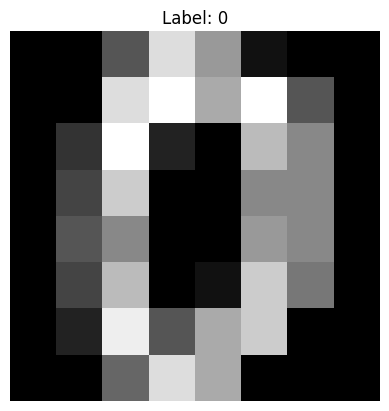

(1797, 8, 8)

In [ ]:
from sklearn.datasets import load_digits #손글씨 데이터 셋
import matplotlib.pyplot as plt
import numpy as np


#여러 이미지가 있는 데이터셋, 분류를 해보자


# 데이터 로드
digits = load_digits()
X_digits = digits.images
y_digits = digits.target

# 데이터 형태 확인
data_shape = X_digits.shape

# 첫 번째 이미지 출력
plt.imshow(X_digits[0], cmap='gray')
plt.title(f"Label: {y_digits[0]}")
plt.axis('off')
plt.show()

data_shape

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

# 이미지 차원 설정
image_dim = X_digits.shape[1] * X_digits.shape[2]

# 이미지를 벡터 형태로 변환
X_digits_reshaped = X_digits.reshape((X_digits.shape[0], image_dim))

# 오토인코더 모델 구축
encoding_dim = 32 # 잠재 벡터의 차원

# 인코더
input_img = Input(shape=(image_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)

# 디코더
decoded = Dense(image_dim, activation='sigmoid')(encoded)

# 전체 오토인코더 모델
autoencoder = Model(input_img, decoded)

# 인코더 모델 (잠재 벡터 추출용)
encoder = Model(input_img, encoded)

# 컴파일 및 훈련
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_digits_reshaped, X_digits_reshaped, epochs=50, batch_size=256, shuffle=True)

# 잠재 벡터 추출
latent_vectors = encoder.predict(X_digits_reshaped)

# 잠재 벡터의 형태 확인
latent_vectors.shape

Epoch 1/50
8/8 [==============================] - 1s 4ms/step - loss: 0.5848
Epoch 2/50
8/8 [==============================] - 0s 3ms/step - loss: -7.5969
Epoch 3/50
8/8 [==============================] - 0s 3ms/step - loss: -17.0112
Epoch 4/50
8/8 [==============================] - 0s 4ms/step - loss: -29.6251
Epoch 5/50
8/8 [==============================] - 0s 4ms/step - loss: -47.0585
Epoch 6/50
8/8 [==============================] - 0s 3ms/step - loss: -70.4854
Epoch 7/50
8/8 [==============================] - 0s 3ms/step - loss: -101.5208
Epoch 8/50
8/8 [==============================] - 0s 3ms/step - loss: -141.5701
Epoch 9/50
8/8 [==============================] - 0s 5ms/step - loss: -191.5129
Epoch 10/50
8/8 [==============================] - 0s 3ms/step - loss: -252.5110
Epoch 11/50
8/8 [==============================] - 0s 3ms/step - loss: -325.5266
Epoch 12/50
8/8 [==============================] - 0s 3ms/step - loss: -412.5187
Epoch 13/50
8/8 [=============================

(1797, 32)

In [ ]:
from sklearn.cluster import KMeans

# K-means 모델 훈련
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_clusters = kmeans.fit_predict(latent_vectors)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


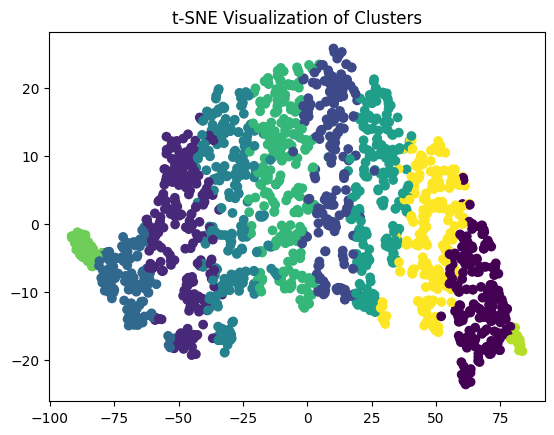

In [ ]:
from sklearn.manifold import TSNE

# t-SNE 적용
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(latent_vectors)

# 군집화 결과 시각화
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_clusters)
plt.title('t-SNE Visualization of Clusters')
plt.show()


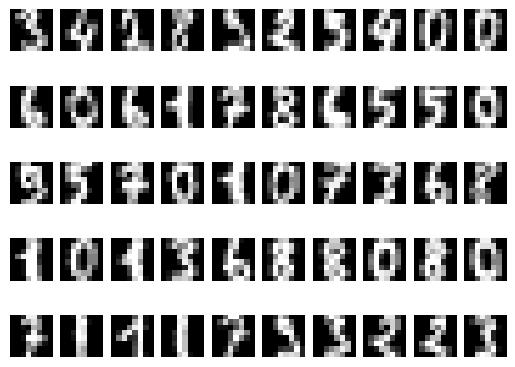

In [ ]:
# 군집별로 이미지 출력
for cluster in range(10):
    cluster_images = X_digits[kmeans_clusters == cluster]
    for i in range(5): # 각 군집에서 5개의 이미지 출력
        plt.subplot(5, 10, cluster * 5 + i + 1)
        plt.imshow(cluster_images[i], cmap='gray')
        plt.axis('off')
plt.show()


In [ ]:
# 군집별 라벨 분포 확인
for cluster in range(10):
    labels = y_digits[kmeans_clusters == cluster]
    unique_labels, counts = np.unique(labels, return_counts=True)
    print(f"Cluster {cluster}: {dict(zip(unique_labels, counts))}")


Cluster 0: {0: 19, 1: 23, 2: 18, 3: 33, 4: 24, 5: 20, 6: 21, 7: 23, 8: 6, 9: 22}
Cluster 1: {0: 23, 1: 11, 2: 38, 3: 37, 4: 20, 5: 15, 6: 27, 7: 19, 8: 31, 9: 23}
Cluster 2: {0: 19, 1: 27, 2: 22, 3: 16, 4: 28, 5: 31, 6: 14, 7: 29, 8: 14, 9: 13}
Cluster 3: {0: 30, 1: 11, 2: 6, 3: 10, 5: 10, 6: 12, 7: 4, 8: 26, 9: 23}
Cluster 4: {0: 13, 1: 20, 2: 28, 3: 20, 4: 44, 5: 28, 6: 23, 7: 24, 8: 27, 9: 20}
Cluster 5: {0: 19, 1: 14, 2: 24, 3: 19, 4: 17, 5: 29, 6: 30, 7: 26, 8: 14, 9: 27}
Cluster 6: {0: 24, 1: 28, 2: 25, 3: 21, 4: 36, 5: 25, 6: 24, 7: 24, 8: 28, 9: 23}
Cluster 7: {0: 6, 1: 18, 6: 4, 8: 13, 9: 5}
Cluster 8: {1: 12, 5: 2, 7: 2}
Cluster 9: {0: 25, 1: 18, 2: 16, 3: 27, 4: 12, 5: 22, 6: 26, 7: 28, 8: 15, 9: 24}


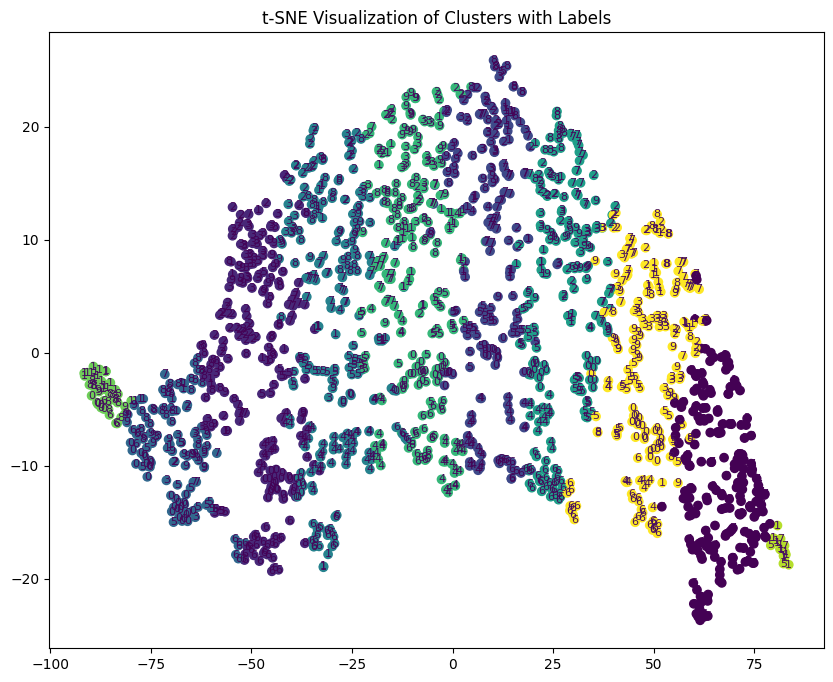

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm

# t-SNE 적용
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(latent_vectors)

# 군집화 결과 시각화 (라벨 표시 포함)
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_clusters, cmap='viridis')

# 각 점 위에 실제 라벨 표시
for i, txt in enumerate(y_digits):
    ax.annotate(txt, (X_tsne[i, 0], X_tsne[i, 1]), fontsize=8, ha='center', va='center', color=cm.viridis(kmeans_clusters[i]))

plt.title('t-SNE Visualization of Clusters with Labels')
plt.show()
